In [1]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

In [3]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [5]:
leagues_countries = countries.merge(leagues,left_on="id",right_on="id",how="outer")
leagues_countries

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A
5,13274,Netherlands,13274,Netherlands Eredivisie
6,15722,Poland,15722,Poland Ekstraklasa
7,17642,Portugal,17642,Portugal Liga ZON Sagres
8,19694,Scotland,19694,Scotland Premier League
9,21518,Spain,21518,Spain LIGA BBVA


In [6]:
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matches_new = matches[['id','country_id','league_id',"season",'stage','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]

In [8]:
matches_new_leagues = matches_new.merge(leagues, left_on = "country_id",right_on = "country_id",how = "left")

In [9]:
matches_new_leagues = matches_new_leagues.drop(columns = ["id_x","id_y"])
matches_new_leagues = matches_new_leagues.rename(columns = {'name' : 'name_league'})

In [10]:
matches_new_leagues

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name_league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,Switzerland Super League
25975,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,Switzerland Super League
25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,Switzerland Super League
25977,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,Switzerland Super League


# JUMLAH PERTANDINGAN PADA SETIAP LIGA

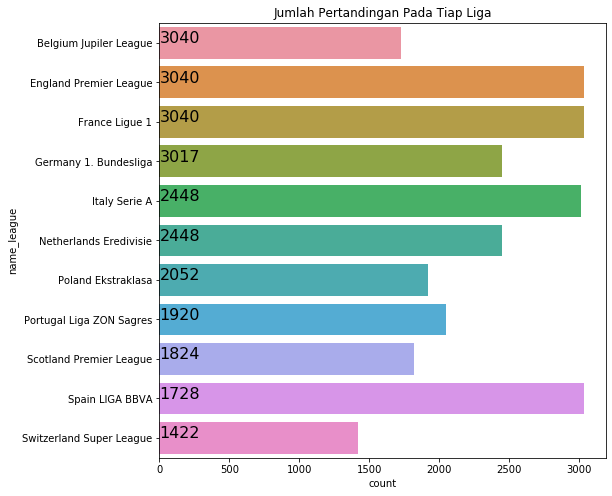

In [11]:
plt.figure(figsize=(8,8))
axe = sns.countplot(y = matches_new_leagues["name_league"],
                   linewidth = 2,)
for i,j in enumerate(matches_new_leagues["name_league"].value_counts().values):
    axe.text(.7,i,j,fontsize = 16)
plt.title("Jumlah Pertandingan Pada Tiap Liga")
plt.show()

# JUMLAH PERTANDINGAN PADA SETIAP SEASON DI SETIAP LIGA 

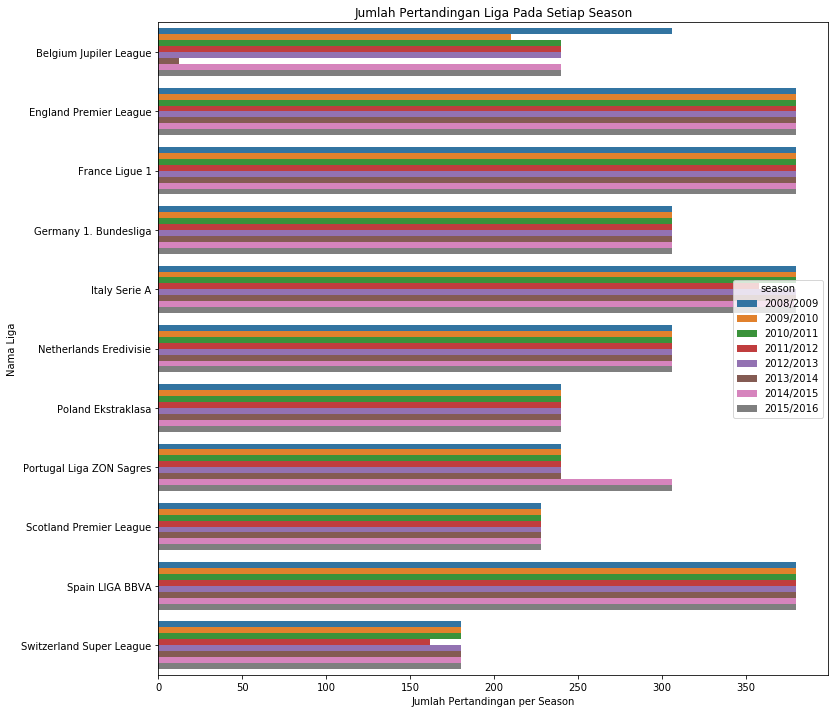

In [12]:
plt.figure(figsize=(12,12))
axe = sns.countplot(y="name_league", hue="season", data=matches_new_leagues)
plt.title("Jumlah Pertandingan Liga Pada Setiap Season")
plt.xlabel("Jumlah Pertandingan per Season")
plt.ylabel("Nama Liga")
plt.show()

In [13]:
def wins_match(row):
    if (row.home_team_goal > row.away_team_goal) :
        return row.home_team_api_id
    elif (row.away_team_goal > row.home_team_goal) :
        return row.away_team_api_id
    else:
        return "No Win"
    
def lose_match(row):
    if (row.home_team_goal > row.away_team_goal) :
        return row.away_team_api_id
    elif (row.away_team_goal > row.home_team_goal) :
        return row.home_team_api_id
    else:
        return "No Win"

matches_new.loc[:,'id_wins_match'] = matches_new.apply(wins_match,axis = 1)
matches_new.loc[:,'id_lose_match'] = matches_new.apply(lose_match,axis = 1)

C:\Users\Paquita\miniconda3\envs\jcop_ud\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Paquita\miniconda3\envs\jcop_ud\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
matches_new

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_wins_match,id_lose_match
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,No Win,No Win
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,No Win,No Win
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,9984
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,9998
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,7947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190,10191
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,9824
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956,10179
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,No Win,No Win


In [15]:
teams_new = teams.loc[:,['team_api_id','team_long_name']]
teams_new

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge
...,...,...
294,10190,FC St. Gallen
295,10191,FC Thun
296,9777,Servette FC
297,7730,FC Lausanne-Sports


In [16]:
matches_new_teams = matches_new.merge(teams_new,left_on="id_wins_match",right_on="team_api_id",how = "left")
matches_new_teams = matches_new_teams.merge(teams_new,left_on="id_lose_match",right_on="team_api_id",how = "left")
matches_new_teams

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_wins_match,id_lose_match,team_api_id_x,team_long_name_x,team_api_id_y,team_long_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,No Win,No Win,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,No Win,No Win,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,9984,8635.0,RSC Anderlecht,9984.0,KSV Cercle Brugge
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,9998,9991.0,KAA Gent,9998.0,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,7947,9985.0,Standard de Liège,7947.0,FCV Dender EH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190,10191,10190.0,FC St. Gallen,10191.0,FC Thun
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,9824,10199.0,FC Luzern,9824.0,FC Vaduz
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956,10179,9956.0,Grasshopper Club Zürich,10179.0,FC Sion
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,No Win,No Win,NaN,NaN,NaN,NaN


In [17]:
matches_new_teams = matches_new_teams.drop(columns = ['team_api_id_x','team_api_id_y'])

In [18]:
matches_new_teams = matches_new_teams.rename(columns = {'team_long_name_x' : 'win_team', 'team_long_name_y':'lose_team'})

In [19]:
matches_new_teams['win_team'] = matches_new_teams['win_team'].fillna('No Win')
matches_new_teams['lose_team'] = matches_new_teams['lose_team'].fillna('No Win')

In [20]:
matches_new_teams

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_wins_match,id_lose_match,win_team,lose_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,No Win,No Win,No Win,No Win
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,No Win,No Win,No Win,No Win
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,9984,RSC Anderlecht,KSV Cercle Brugge
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,9998,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,7947,Standard de Liège,FCV Dender EH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190,10191,FC St. Gallen,FC Thun
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,9824,FC Luzern,FC Vaduz
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956,10179,Grasshopper Club Zürich,FC Sion
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,No Win,No Win,No Win,No Win


In [21]:
matches_new_teams = matches_new_teams.drop(columns = ['id_wins_match','id_lose_match'])

In [22]:
matches_new_teams = matches_new_teams.merge(leagues_countries,left_on = 'country_id',right_on = 'id', how='left')

In [23]:
matches_new_teams = matches_new_teams.drop(columns = ['id_y','name_x','country_id_y'])
matches_new_teams = matches_new_teams.rename(columns = {'name_y':'league_name'})

In [24]:
matches_new_teams

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,win_team,lose_team,league_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,No Win,No Win,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,No Win,No Win,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,RSC Anderlecht,KSV Cercle Brugge,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,KAA Gent,RAEC Mons,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Standard de Liège,FCV Dender EH,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,FC St. Gallen,FC Thun,Switzerland Super League
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,FC Luzern,FC Vaduz,Switzerland Super League
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,Grasshopper Club Zürich,FC Sion,Switzerland Super League
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,No Win,No Win,Switzerland Super League


In [25]:
team_wins = pd.DataFrame(matches_new_teams.groupby(["league_name","season","win_team"])["win_team"].count())
team_wins

win_team
league_name              season    win_team                         
Belgium Jupiler League   2008/2009 Beerschot AC                   11
                                   Club Brugge KV                 18
                                   FCV Dender EH                   9
                                   KAA Gent                       17
                                   KRC Genk                       15
...                                                              ...
Switzerland Super League 2015/2016 FC Vaduz                        7
                                   FC Zürich                       7
                                   Grasshopper Club Zürich        15
                                   Lugano                          9
                                   No Win                         47

[1566 rows x 1 columns]

In [26]:
team_wins = team_wins.rename(columns={"win_team":"team"}).reset_index()
team_wins

,league_name,season,win_team,team
0,Belgium Jupiler League,2008/2009,Beerschot AC,11
1,Belgium Jupiler League,2008/2009,Club Brugge KV,18
2,Belgium Jupiler League,2008/2009,FCV Dender EH,9
3,Belgium Jupiler League,2008/2009,KAA Gent,17
4,Belgium Jupiler League,2008/2009,KRC Genk,15
...,...,...,...,...
1561,Switzerland Super League,2015/2016,FC Vaduz,7
1562,Switzerland Super League,2015/2016,FC Zürich,7
1563,Switzerland Super League,2015/2016,Grasshopper Club Zürich,15
1564,Switzerland Super League,2015/2016,Lugano,9


In [27]:
team_wins = team_wins.rename(columns = {"team":"count_win"})
team_wins

,league_name,season,win_team,count_win
0,Belgium Jupiler League,2008/2009,Beerschot AC,11
1,Belgium Jupiler League,2008/2009,Club Brugge KV,18
2,Belgium Jupiler League,2008/2009,FCV Dender EH,9
3,Belgium Jupiler League,2008/2009,KAA Gent,17
4,Belgium Jupiler League,2008/2009,KRC Genk,15
...,...,...,...,...
1561,Switzerland Super League,2015/2016,FC Vaduz,7
1562,Switzerland Super League,2015/2016,FC Zürich,7
1563,Switzerland Super League,2015/2016,Grasshopper Club Zürich,15
1564,Switzerland Super League,2015/2016,Lugano,9


In [28]:
team_wins = team_wins.sort_values(by = "count_win",ascending = False)
team_wins

,league_name,season,win_team,count_win
345,France Ligue 1,2010/2011,No Win,130
752,Italy Serie A,2014/2015,No Win,120
305,France Ligue 1,2008/2009,No Win,112
180,England Premier League,2010/2011,No Win,111
218,England Premier League,2012/2013,No Win,108
...,...,...,...,...
929,Netherlands Eredivisie,2015/2016,SC Cambuur,3
443,France Ligue 1,2015/2016,ES Troyes AC,3
88,Belgium Jupiler League,2013/2014,Lierse SK,2
89,Belgium Jupiler League,2013/2014,No Win,2


In [29]:
team_wins = team_wins[team_wins["win_team"] != "No Win"]
team_wins

,league_name,season,win_team,count_win
727,Italy Serie A,2013/2014,Juventus,33
1387,Spain LIGA BBVA,2011/2012,Real Madrid CF,32
1397,Spain LIGA BBVA,2012/2013,FC Barcelona,32
1343,Spain LIGA BBVA,2009/2010,Real Madrid CF,31
1335,Spain LIGA BBVA,2009/2010,FC Barcelona,31
...,...,...,...,...
273,England Premier League,2015/2016,Aston Villa,3
929,Netherlands Eredivisie,2015/2016,SC Cambuur,3
443,France Ligue 1,2015/2016,ES Troyes AC,3
88,Belgium Jupiler League,2013/2014,Lierse SK,2


In [30]:
count_win = team_wins.groupby(["league_name","win_team"])["count_win"].sum().reset_index()

In [31]:
count_win['league_name'].unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)

# TEAM DENGAN KEMENANGAN TERBANYAK

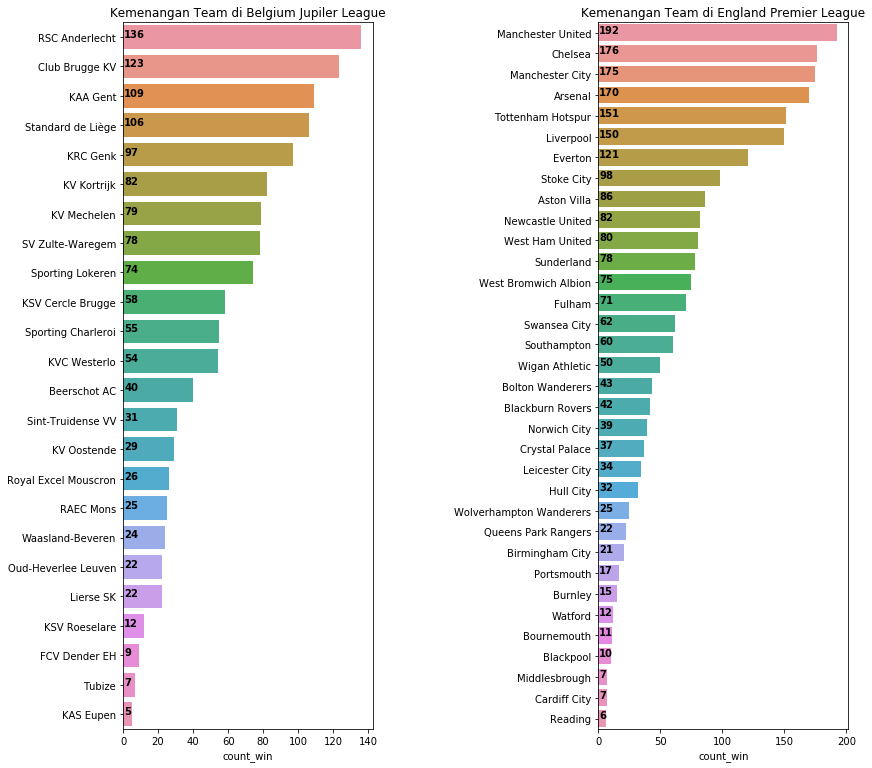

In [32]:
count_win = count_win.sort_values(by="count_win",ascending= False)
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']=='Belgium Jupiler League'],linewidth = 1)
plt.ylabel('')
plt.title("Kemenangan Team di Belgium Jupiler League")
for i,j in enumerate(count_win[count_win['league_name']=='Belgium Jupiler League']['count_win']):
    ax.text(.7,i,j,weight = "bold")
    
plt.subplot(122)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']=='England Premier League'],linewidth = 1)
plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Kemenangan Team di England Premier League")
for i,j in enumerate(count_win[count_win['league_name']=='England Premier League']['count_win']):
    ax.text(.7,i,j,weight = "bold")

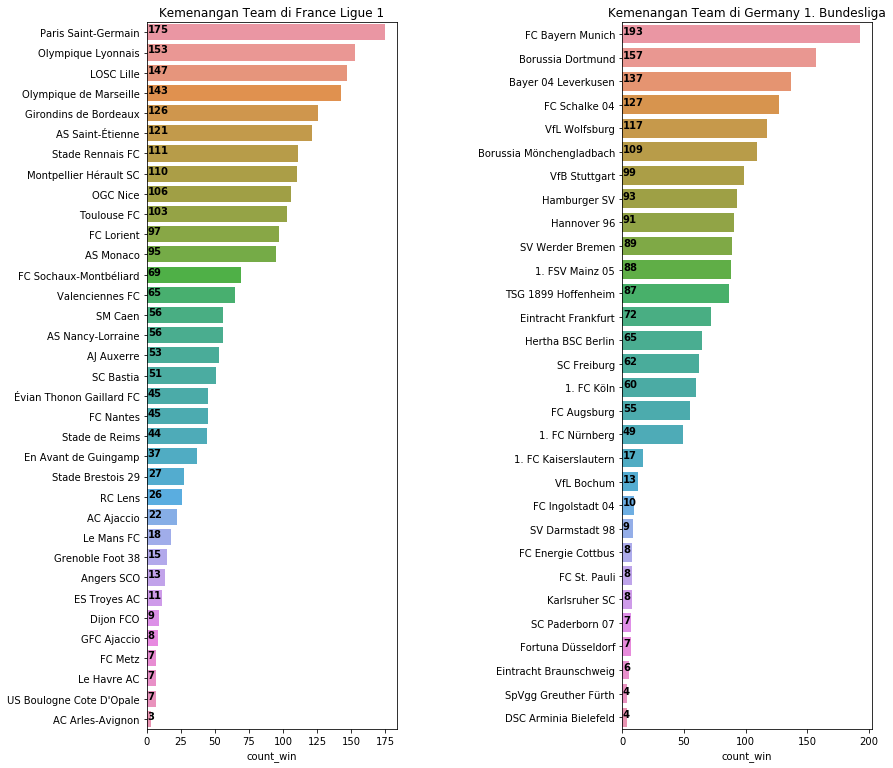

In [33]:
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'France Ligue 1'],linewidth = 1)

plt.ylabel('')
plt.title("Kemenangan Team di France Ligue 1")
for i,j in enumerate(count_win[count_win['league_name']== 'France Ligue 1']['count_win']):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Germany 1. Bundesliga'],linewidth = 1)
plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Kemenangan Team di Germany 1. Bundesliga")
for i,j in enumerate(count_win[count_win['league_name']== 'Germany 1. Bundesliga']['count_win']):
    ax.text(.7,i,j,weight = "bold")


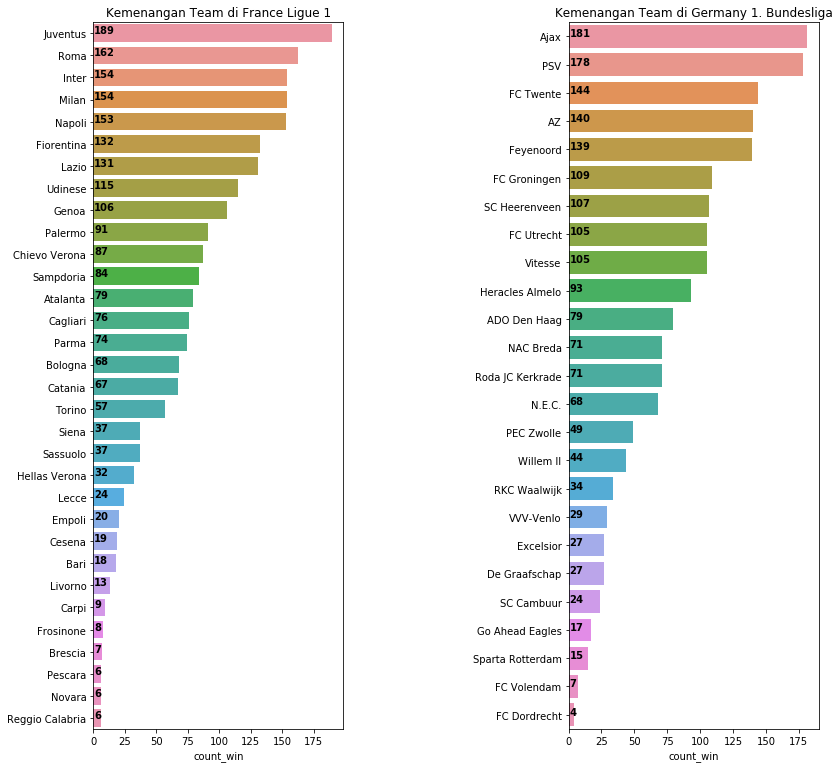

In [34]:
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Italy Serie A'],linewidth = 1)

plt.ylabel('')
plt.title("Kemenangan Team di France Ligue 1")
for i,j in enumerate(count_win[count_win['league_name']== 'Italy Serie A']['count_win']):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Netherlands Eredivisie'],linewidth = 1)
plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Kemenangan Team di Germany 1. Bundesliga")
for i,j in enumerate(count_win[count_win['league_name']== 'Netherlands Eredivisie']['count_win']):
    ax.text(.7,i,j,weight = "bold")


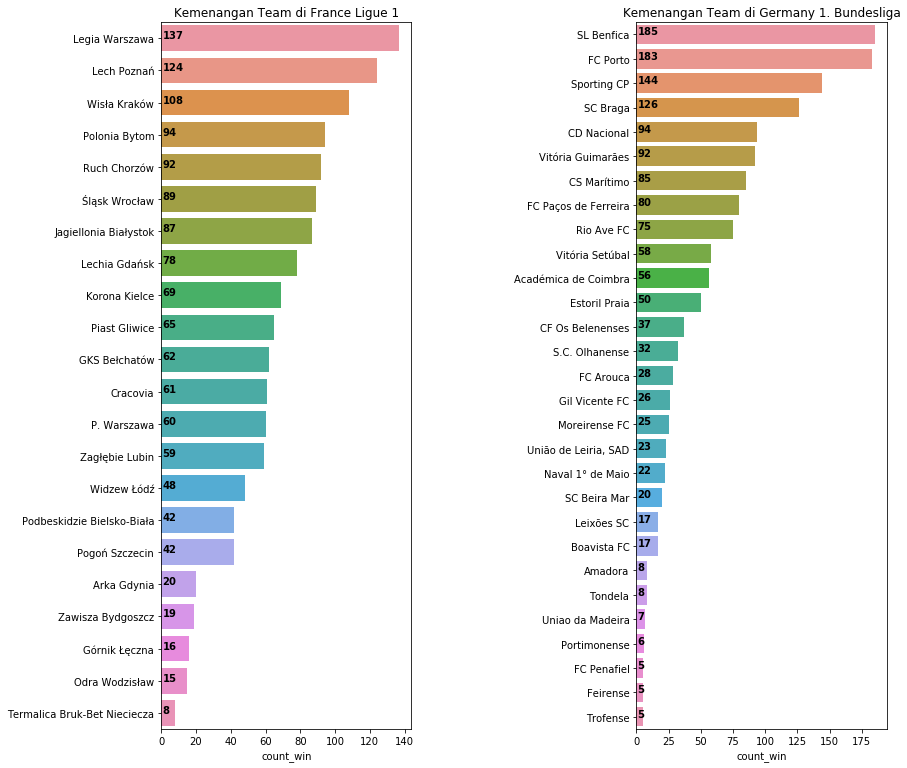

In [35]:
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Poland Ekstraklasa'],linewidth = 1)

plt.ylabel('')
plt.title("Kemenangan Team di France Ligue 1")
for i,j in enumerate(count_win[count_win['league_name']== 'Poland Ekstraklasa']['count_win']):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Portugal Liga ZON Sagres'],linewidth = 1)
plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Kemenangan Team di Germany 1. Bundesliga")
for i,j in enumerate(count_win[count_win['league_name']== 'Portugal Liga ZON Sagres']['count_win']):
    ax.text(.7,i,j,weight = "bold")

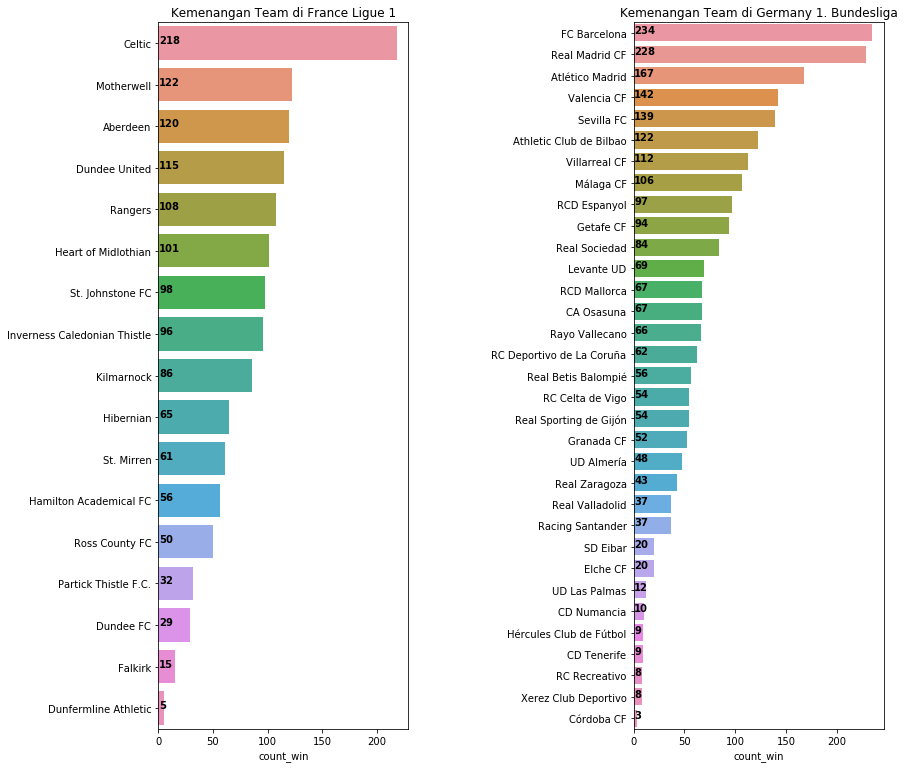

In [36]:
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Scotland Premier League'], linewidth = 1)

plt.ylabel('')
plt.title("Kemenangan Team di France Ligue 1")
for i,j in enumerate(count_win[count_win['league_name']== 'Scotland Premier League']['count_win']):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Spain LIGA BBVA'],linewidth = 1)
plt.ylabel("")
plt.subplots_adjust(wspace = .9)
plt.title("Kemenangan Team di Germany 1. Bundesliga")
for i,j in enumerate(count_win[count_win['league_name']== 'Spain LIGA BBVA']['count_win']):
    ax.text(.7,i,j,weight = "bold")

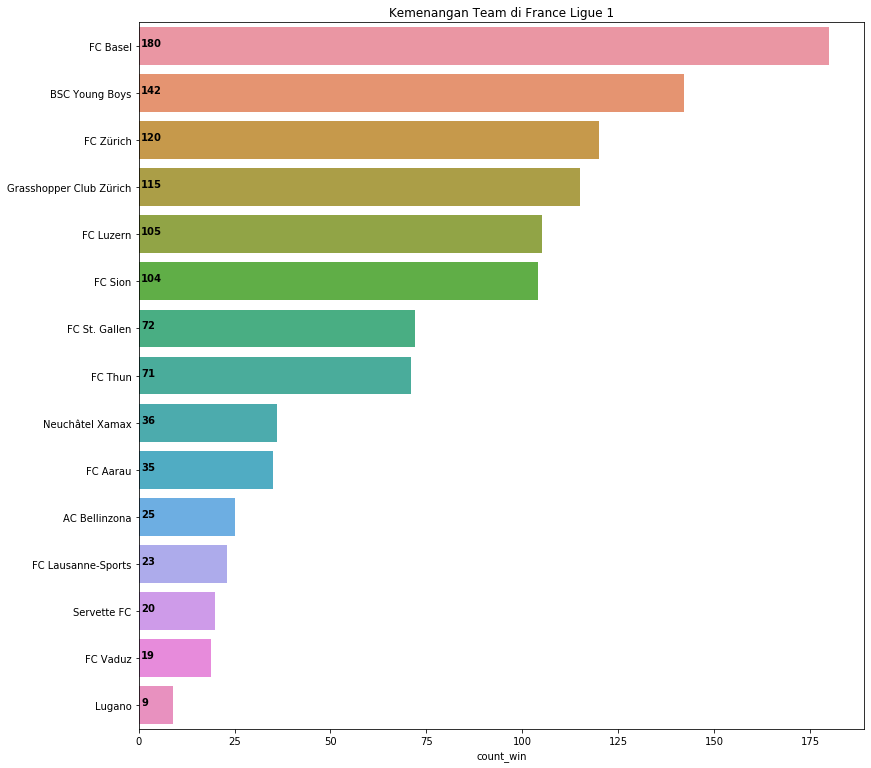

In [37]:
plt.figure(figsize=(13,13))
plt.plot()
ax = sns.barplot(y="win_team",x="count_win",
                 data=count_win[count_win['league_name']== 'Switzerland Super League'],linewidth = 1)

plt.ylabel('')
plt.title("Kemenangan Team di France Ligue 1")
for i,j in enumerate(count_win[count_win['league_name']== 'Switzerland Super League']['count_win']):
    ax.text(.7,i,j,weight = "bold")

# TEAM DENGAN KEMENANGAN TERBANYAK DARI SEMUA LIGA

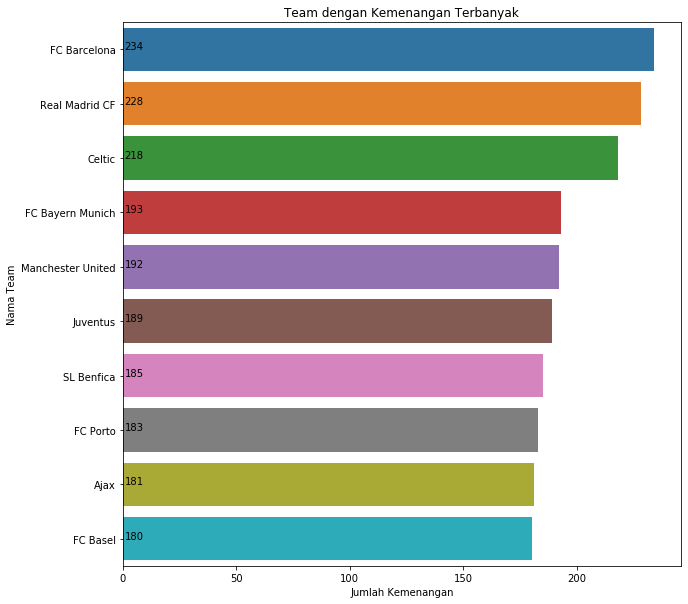

In [38]:
plt.figure(figsize=(10,10))
plt.plot()
axe = sns.barplot(y = 'win_team', x = "count_win",data=count_win.head(10),linewidth=1)
plt.title('Team dengan Kemenangan Terbanyak')
plt.xlabel('Jumlah Kemenangan')
plt.ylabel('Nama Team')
for i,j in enumerate(count_win['count_win'].head(10)):
    axe.text(.7,i,j)

#  TEAM DENGAN KEKALAHAN TERBANYAK 

In [39]:
lose_teams = pd.DataFrame(matches_new_teams.groupby(["league_name","lose_team"])["lose_team"].count())
lose_teams

lose_team
league_name              lose_team                         
Belgium Jupiler League   Beerschot AC                    70
                         Club Brugge KV                  49
                         FCV Dender EH                   17
                         KAA Gent                        54
                         KAS Eupen                       17
...                                                     ...
Switzerland Super League Grasshopper Club Zürich        104
                         Lugano                          19
                         Neuchâtel Xamax                 59
                         No Win                         346
                         Servette FC                     36

[307 rows x 1 columns]

In [40]:
team_lose = lose_teams.rename(columns = {'lose_team':'count_lose_team'}).reset_index()
team_lose

,league_name,lose_team,count_lose_team
0,Belgium Jupiler League,Beerschot AC,70
1,Belgium Jupiler League,Club Brugge KV,49
2,Belgium Jupiler League,FCV Dender EH,17
3,Belgium Jupiler League,KAA Gent,54
4,Belgium Jupiler League,KAS Eupen,17
...,...,...,...
302,Switzerland Super League,Grasshopper Club Zürich,104
303,Switzerland Super League,Lugano,19
304,Switzerland Super League,Neuchâtel Xamax,59
305,Switzerland Super League,No Win,346


In [41]:
team_lose = team_lose.sort_values(by ="count_lose_team",ascending = False)
team_lose

,league_name,lose_team,count_lose_team
81,France Ligue 1,No Win,859
148,Italy Serie A,No Win,796
45,England Premier League,No Win,783
270,Spain LIGA BBVA,No Win,704
117,Germany 1. Bundesliga,No Win,597
...,...,...,...
66,France Ligue 1,Angers SCO,14
103,Germany 1. Bundesliga,DSC Arminia Bielefeld,14
120,Germany 1. Bundesliga,SV Darmstadt 98,14
203,Poland Ekstraklasa,Termalica Bruk-Bet Nieciecza,13


In [42]:
team_lose = team_lose[team_lose['lose_team'] != "No Win"]
team_lose

,league_name,lose_team,count_lose_team
249,Scotland Premier League,Kilmarnock,142
265,Spain LIGA BBVA,Getafe CF,139
52,England Premier League,Sunderland,134
274,Spain LIGA BBVA,RCD Espanyol,134
256,Scotland Premier League,St. Mirren,131
...,...,...,...
66,France Ligue 1,Angers SCO,14
103,Germany 1. Bundesliga,DSC Arminia Bielefeld,14
120,Germany 1. Bundesliga,SV Darmstadt 98,14
203,Poland Ekstraklasa,Termalica Bruk-Bet Nieciecza,13


In [43]:
count_lose = team_lose.sort_values(by="count_lose_team",ascending= False)
count_lose

,league_name,lose_team,count_lose_team
249,Scotland Premier League,Kilmarnock,142
265,Spain LIGA BBVA,Getafe CF,139
52,England Premier League,Sunderland,134
274,Spain LIGA BBVA,RCD Espanyol,134
256,Scotland Premier League,St. Mirren,131
...,...,...,...
66,France Ligue 1,Angers SCO,14
103,Germany 1. Bundesliga,DSC Arminia Bielefeld,14
120,Germany 1. Bundesliga,SV Darmstadt 98,14
203,Poland Ekstraklasa,Termalica Bruk-Bet Nieciecza,13


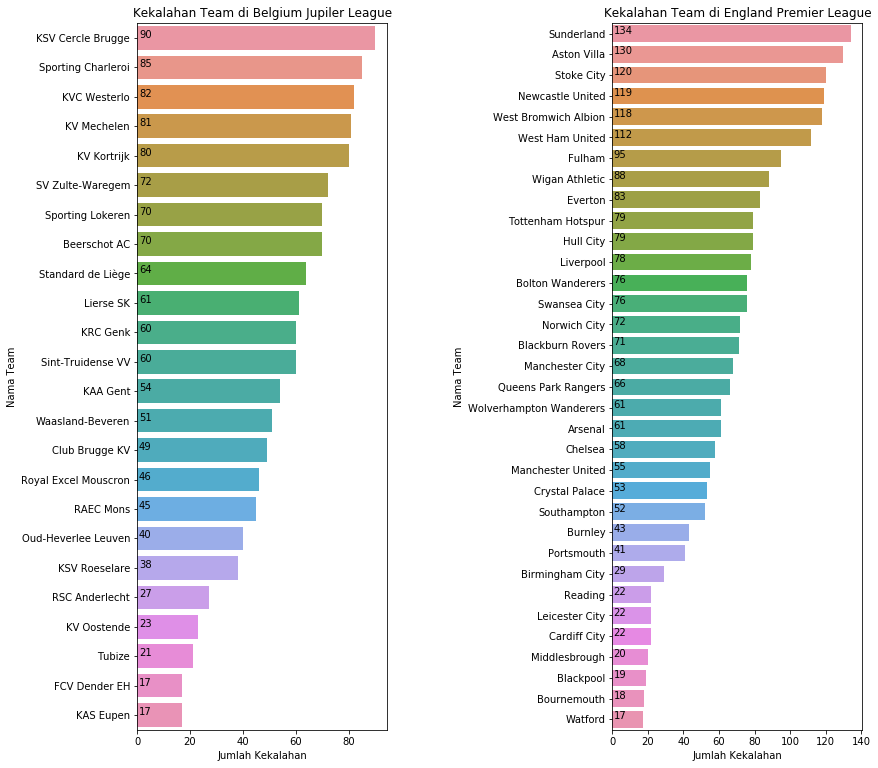

In [44]:
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="lose_team",x="count_lose_team",
                 data=count_lose[count_lose['league_name']=='Belgium Jupiler League'],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.title("Kekalahan Team di Belgium Jupiler League")
for i,j in enumerate(count_lose[count_lose['league_name']=='Belgium Jupiler League']['count_lose_team']):
    ax.text(.7,i,j)
    
plt.subplot(122)
ax = sns.barplot(y="lose_team",x="count_lose_team",
                 data=count_lose[count_lose['league_name']=='England Premier League'],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.subplots_adjust(wspace = .9)
plt.title("Kekalahan Team di England Premier League")
for i,j in enumerate(count_lose[count_lose['league_name']=='England Premier League']['count_lose_team']):
    ax.text(.7,i,j)

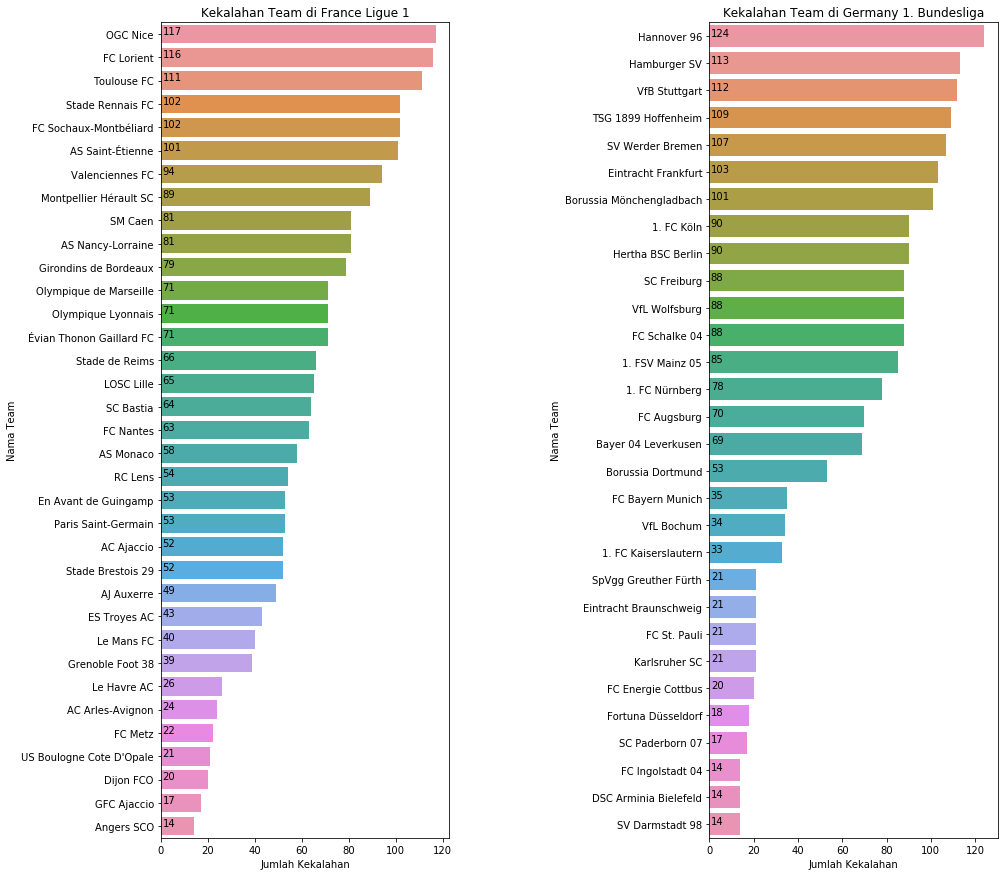

In [45]:
plt.figure(figsize = (15,15))
plt.subplot(121)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == "France Ligue 1"],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.title('Kekalahan Team di France Ligue 1')
for i,j in enumerate(count_lose[count_lose['league_name']=='France Ligue 1']['count_lose_team']):
    ax.text(.7,i,j)

plt.subplot(122)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == "Germany 1. Bundesliga"],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.subplots_adjust(wspace = .9)
plt.title('Kekalahan Team di Germany 1. Bundesliga')
for i,j in enumerate(count_lose[count_lose['league_name']=='Germany 1. Bundesliga']['count_lose_team']):
    ax.text(.7,i,j)

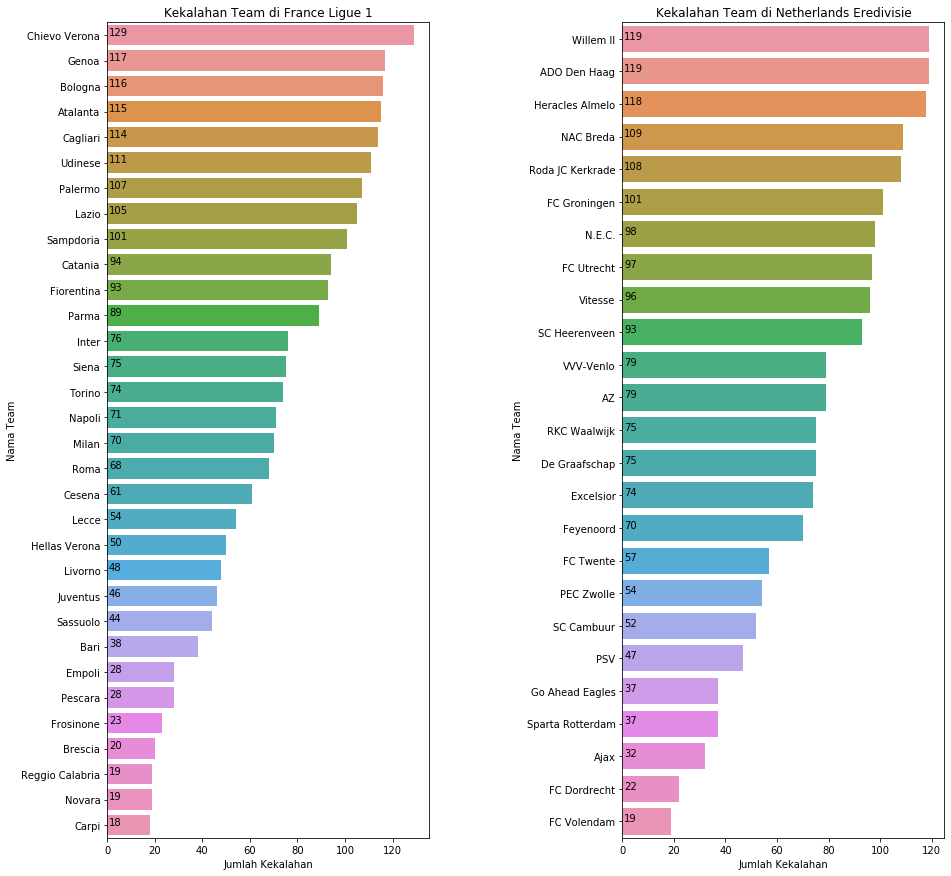

In [46]:
plt.figure(figsize = (15,15))
plt.subplot(121)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == 'Italy Serie A'],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.title('Kekalahan Team di France Ligue 1')
for i,j in enumerate(count_lose[count_lose['league_name']=='Italy Serie A']['count_lose_team']):
    ax.text(.7,i,j)

plt.subplot(122)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == "Netherlands Eredivisie"],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.title('Kekalahan Team di Netherlands Eredivisie')
plt.subplots_adjust(wspace = .6)
for i,j in enumerate(count_lose[count_lose['league_name']=='Netherlands Eredivisie']['count_lose_team']):
    ax.text(.7,i,j)

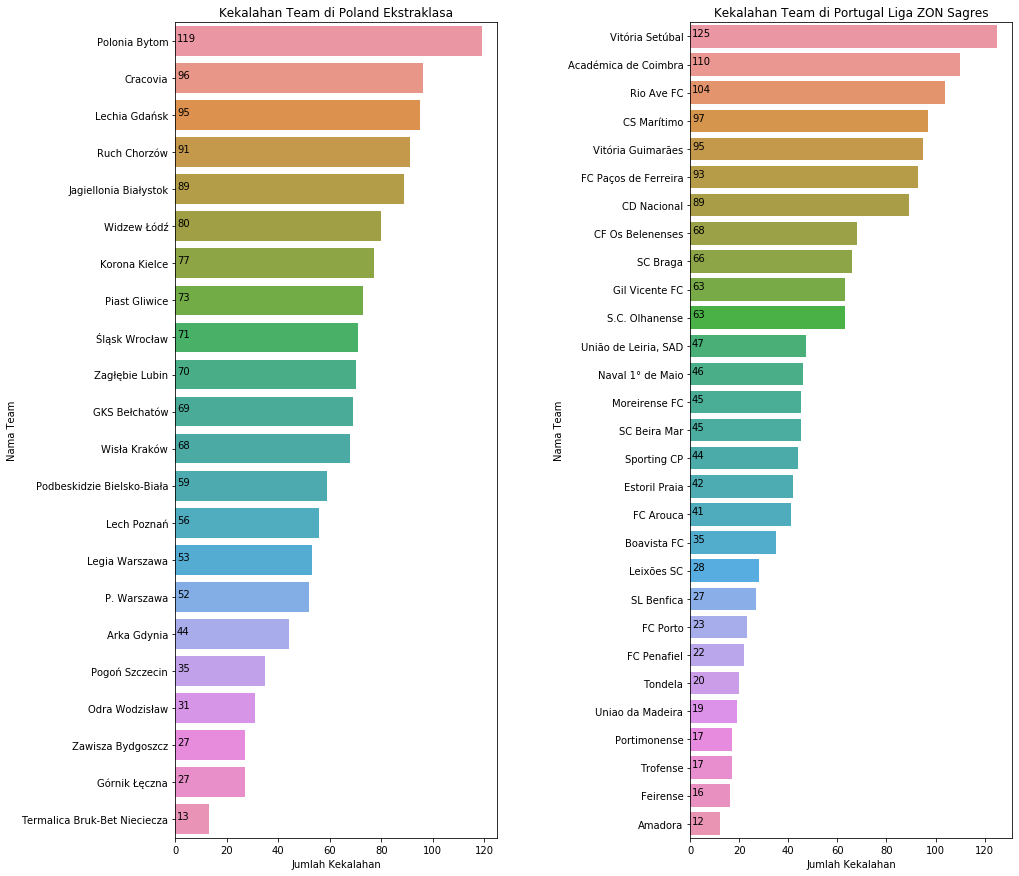

In [47]:
plt.figure(figsize = (15,15))
plt.subplot(121)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == 'Poland Ekstraklasa'],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.title('Kekalahan Team di Poland Ekstraklasa')
for i,j in enumerate(count_lose[count_lose['league_name']=='Poland Ekstraklasa']['count_lose_team']):
    ax.text(.7,i,j)

plt.subplot(122)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == "Portugal Liga ZON Sagres"],linewidth = 1)
plt.ylabel("Nama Team")
plt.xlabel("Jumlah Kekalahan")
plt.subplots_adjust(wspace=.6)
plt.title('Kekalahan Team di Portugal Liga ZON Sagres')
for i,j in enumerate(count_lose[count_lose['league_name']=='Portugal Liga ZON Sagres']['count_lose_team']):
    ax.text(.7,i,j)

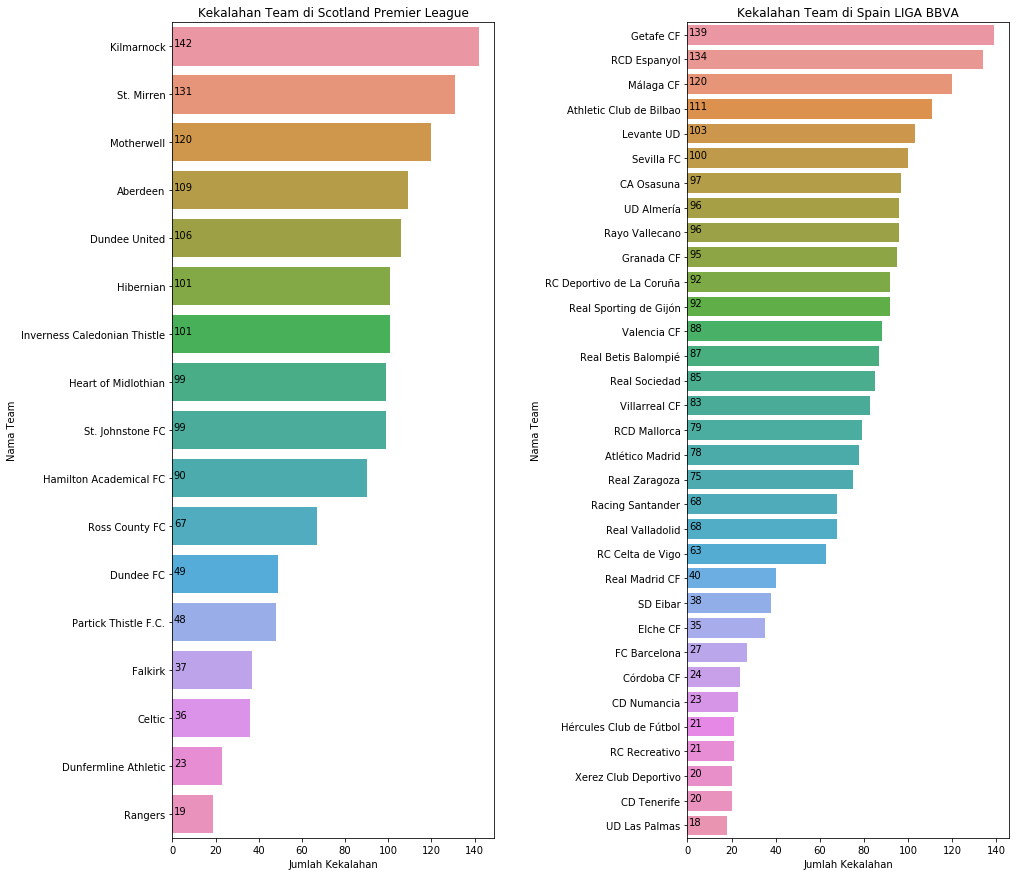

In [48]:
plt.figure(figsize = (15,15))
plt.subplot(121)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == 'Scotland Premier League'],linewidth = 1)
plt.xlabel('Jumlah Kekalahan')
plt.ylabel('Nama Team')
plt.title('Kekalahan Team di Scotland Premier League')
for i,j in enumerate(count_lose[count_lose['league_name']=='Scotland Premier League']['count_lose_team']):
    ax.text(.7,i,j)

plt.subplot(122)
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == "Spain LIGA BBVA"],linewidth = 1)
plt.xlabel('Jumlah Kekalahan')
plt.ylabel('Nama Team')
plt.title('Kekalahan Team di Spain LIGA BBVA')
plt.subplots_adjust(wspace=.6)
for i,j in enumerate(count_lose[count_lose['league_name']=='Spain LIGA BBVA']['count_lose_team']):
    ax.text(.7,i,j)

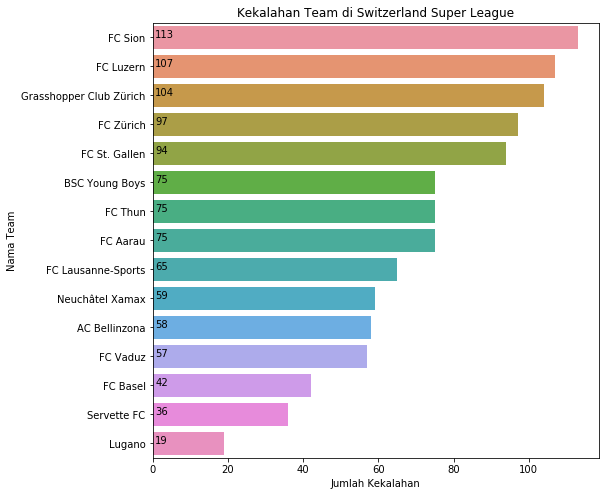

In [49]:
plt.figure(figsize = (8,8))
plt.plot()
ax = sns.barplot(y ="lose_team", x ="count_lose_team",data = count_lose[count_lose["league_name"] == 'Switzerland Super League'],linewidth = 1)
plt.xlabel('Jumlah Kekalahan')
plt.ylabel('Nama Team')
plt.title('Kekalahan Team di Switzerland Super League')
for i,j in enumerate(count_lose[count_lose['league_name']=='Switzerland Super League']['count_lose_team']):
    ax.text(.7,i,j)

# TEAM DENGAN KEKALAHAN TERBANYAK DARI SEMUA LIGA 

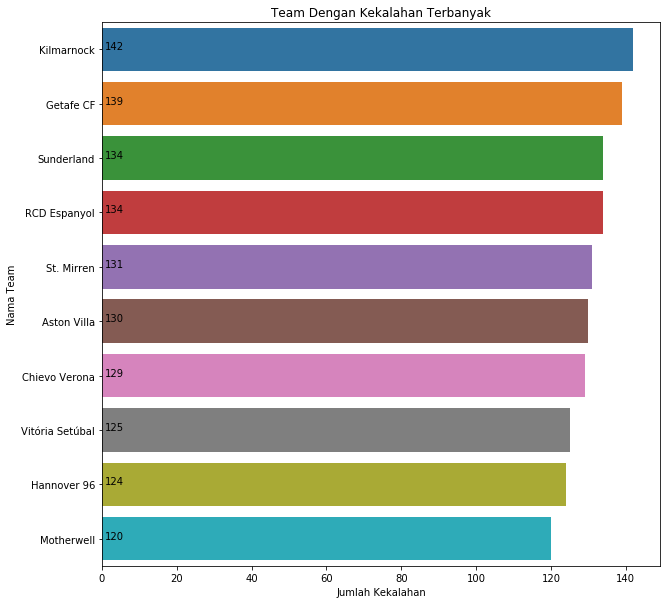

In [50]:
plt.figure(figsize=(10,10))
plt.plot()
axe = sns.barplot(y = 'lose_team' , x ='count_lose_team',data = count_lose.head(10))
plt.title('Team Dengan Kekalahan Terbanyak')
plt.xlabel('Jumlah Kekalahan')
plt.ylabel('Nama Team')
for i,j in enumerate(count_lose['count_lose_team'].head(10)):
    axe.text(.7,i,j)

In [51]:
player_attributes_new = player_attributes.merge(player,left_on='player_api_id',right_on='player_api_id',how='left')
player_attributes_new

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [53]:
player_penalties

,player_api_id,player_name,accurasi_penalties
1130,26099,Paolo Maldini,92
1994,30909,David Villa,89
1887,30714,Francesco Totti,89
5808,108808,Mario Balotelli,89
3293,38248,Dario Smoje,89
...,...,...,...
5303,80265,Giedrius Arlauskis,9
3521,38962,Sven van der Jeugt,9
3996,40976,Marcelo Moretto,9
5011,69793,Jakub Divis,9


In [54]:
player_penalties = player_attributes_new[['player_api_id','date','penalties','player_name','player_fifa_api_id_y']]
player_penalties = player_penalties.drop(columns = ['player_fifa_api_id_y'])
player_penalties = pd.DataFrame(player_penalties.groupby(['player_api_id','player_name'])['penalties'].mean())
player_penalties = player_penalties.rename(columns = {'penalties':'accurasi_penalties'}).reset_index()
player_penalties['accurasi_penalties'] = player_penalties['accurasi_penalties'].apply(lambda x: int(x))
player_penalties = player_penalties.sort_values(by = 'accurasi_penalties',ascending = False)

#  TOP 20 PEMAIN DENGAN AKURASI PENALTI TERBAIK

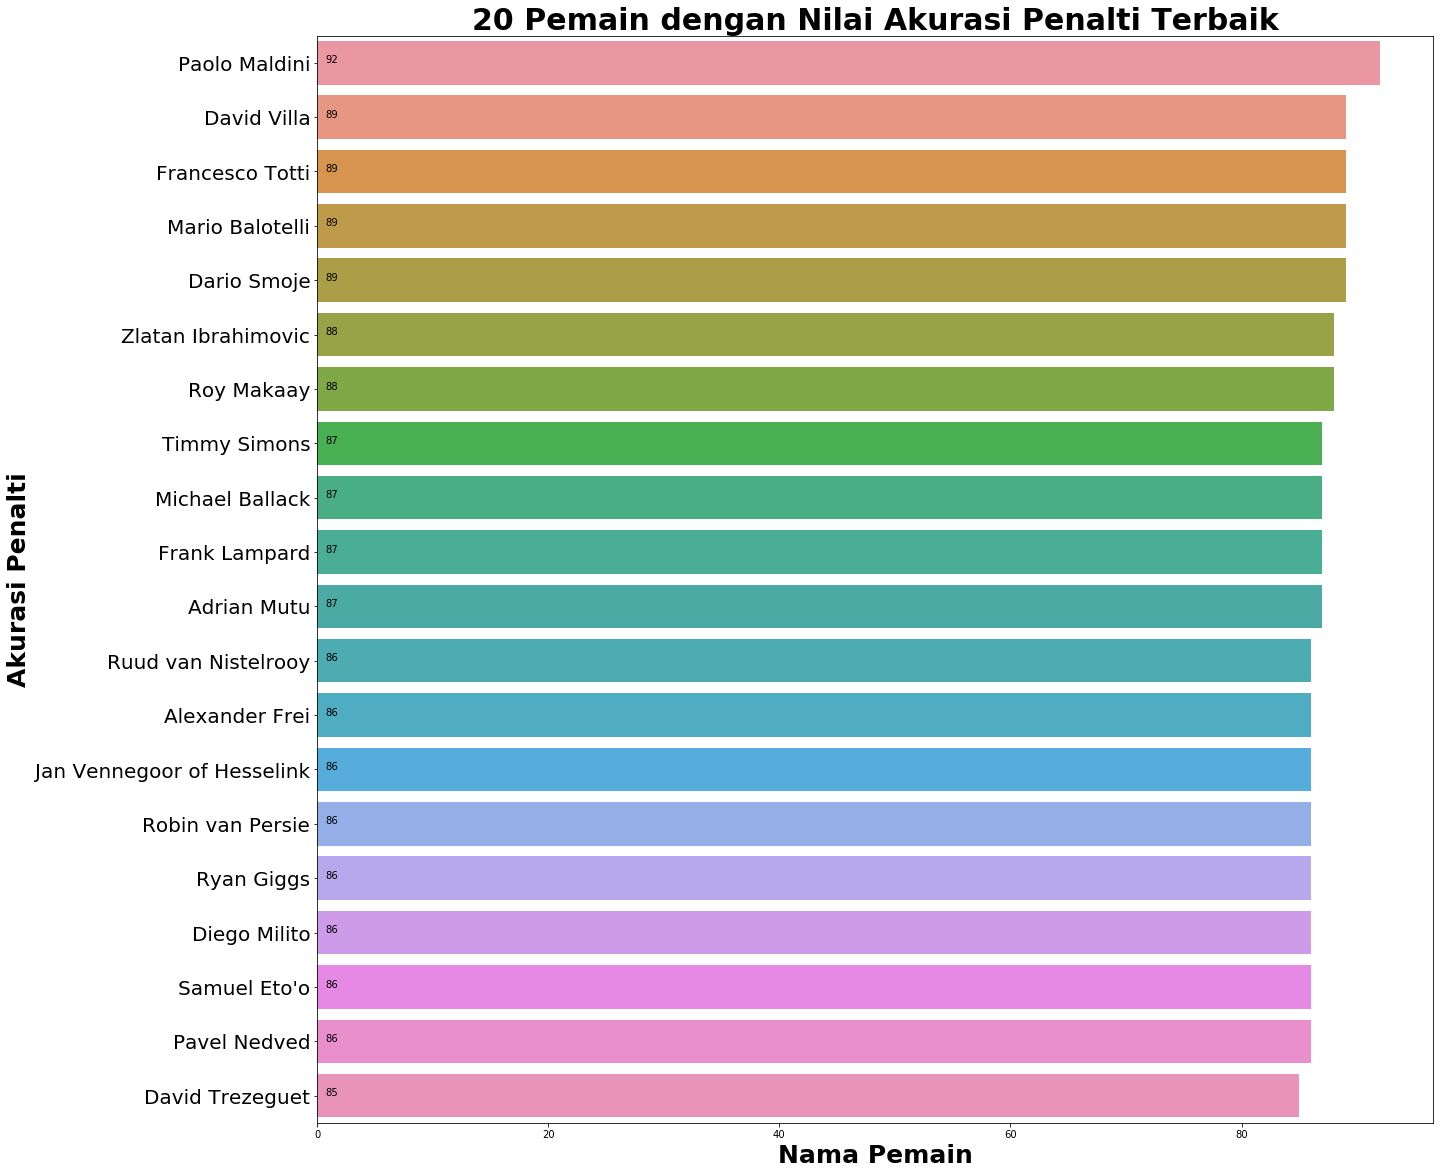

In [55]:
plt.figure(figsize=(20,20))
plt.plot()
axe = sns.barplot(y = 'player_name',x='accurasi_penalties',data=player_penalties.head(20))
plt.title('20 Pemain dengan Nilai Akurasi Penalti Terbaik',fontsize=30,fontweight='bold')
plt.xlabel('Nama Pemain',fontsize=25,fontweight='bold')
plt.ylabel('Akurasi Penalti',fontsize=25,fontweight='bold')
plt.yticks(fontsize=20)
for i,j in enumerate(player_penalties['accurasi_penalties'].head(20)):
    axe.text(.7,i,j)